In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


# Exploring Data

In [73]:
hr = pd.read_csv('/kaggle/input/human-resources-data-set/HRDataset_v14.csv')

In [5]:
pd.options.display.max_columns = None
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
hr.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,0,20,Production Technician II,MA,1810,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,1,19,Production Technician I,MA,2458,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,0,6,CIO,MA,2067,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,0,9,Data Analyst,MA,2148,02/24/79,F,Single,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,0,19,Production Technician I,MA,1730,08/17/78,F,Widowed,US Citizen,No,Asian,9/29/2014,NaN,N/A-StillEmployed,Active,Production,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


In [7]:
hr.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [10]:
hr.isna().sum().sort_values(ascending = False).head()

DateofTermination    207
ManagerID              8
EmpID                  0
RaceDesc               0
DateofHire             0
dtype: int64

# EDA

### Is there any relationship between who a person works for and their performance score?

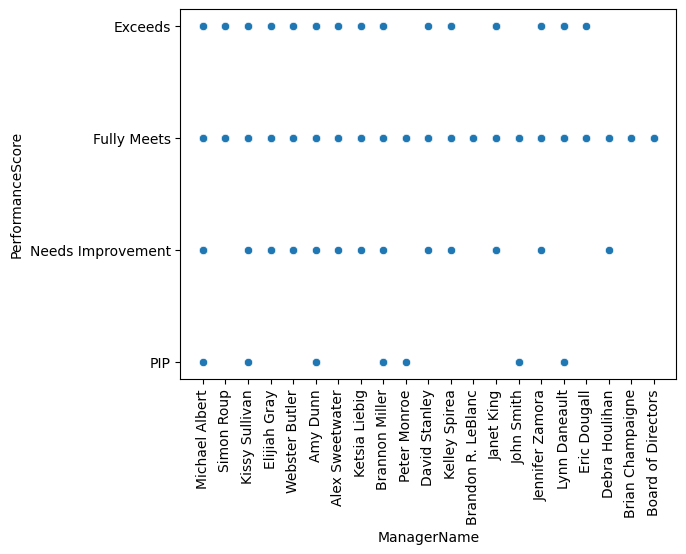

In [17]:
plt.figure()
sns.scatterplot(data = hr, x = 'ManagerName', y = 'PerformanceScore')
plt.xticks(rotation=90)
plt.show()

#### All the managers have employees that scores "Fully Meet" which may imply that is no correlation between the manager and performance so that I need further investigating.

In [30]:
hr_performance = hr.groupby('ManagerName').PerformanceScore.value_counts().unstack()

<AxesSubplot:xlabel='Fully Meets', ylabel='ManagerName'>

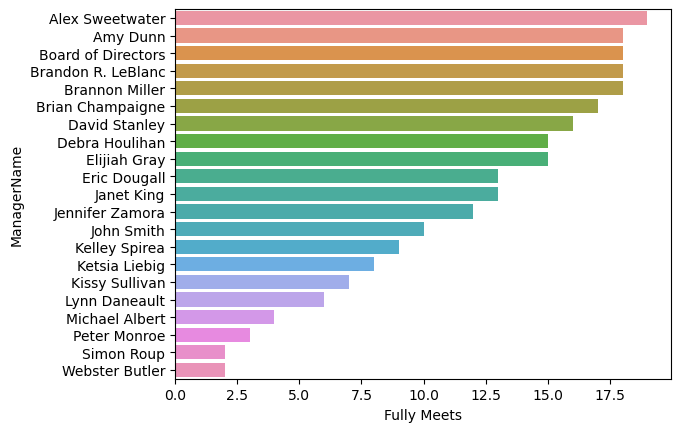

In [31]:
sns.barplot(data = hr_performance.sort_values("Fully Meets", ascending = False),
            x = "Fully Meets", y = hr_performance.index)

<AxesSubplot:xlabel='Exceeds', ylabel='ManagerName'>

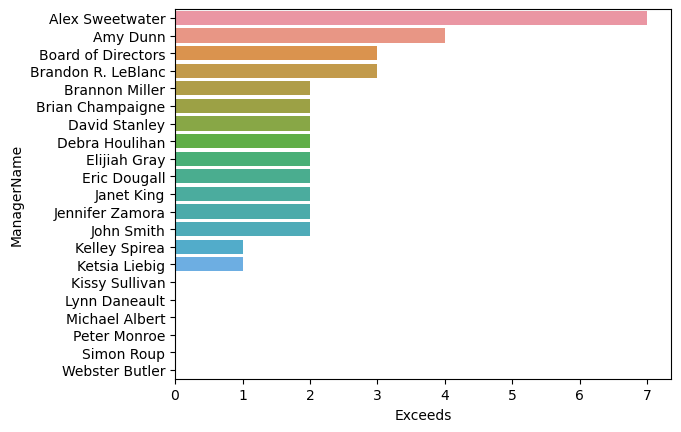

In [32]:
sns.barplot(data = hr_performance.sort_values('Exceeds', ascending = False),
            x = 'Exceeds', y = hr_performance.index)

#### It seems that Alex Sweetwater has the most productive employees

### What are our best recruiting sources if we want to ensure a productive organization?

In [37]:
hr_source = hr.groupby('RecruitmentSource').PerformanceScore.value_counts().unstack()

<AxesSubplot:xlabel='Exceeds', ylabel='RecruitmentSource'>

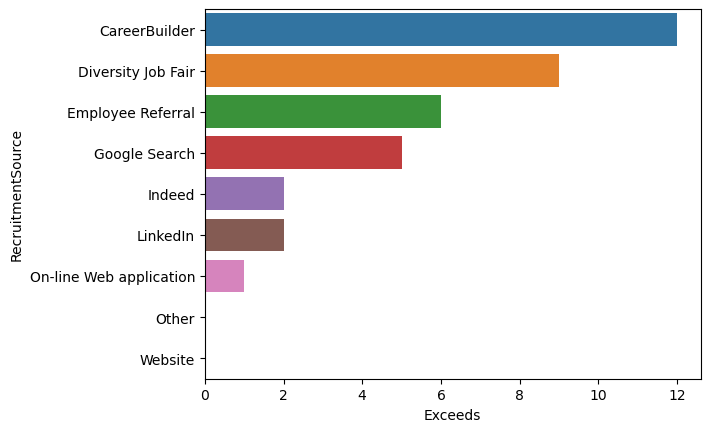

In [42]:
sns.barplot(data = hr_source.sort_values('Exceeds', ascending = False),
            x = 'Exceeds', y =  hr_source.index)

<AxesSubplot:xlabel='Fully Meets', ylabel='RecruitmentSource'>

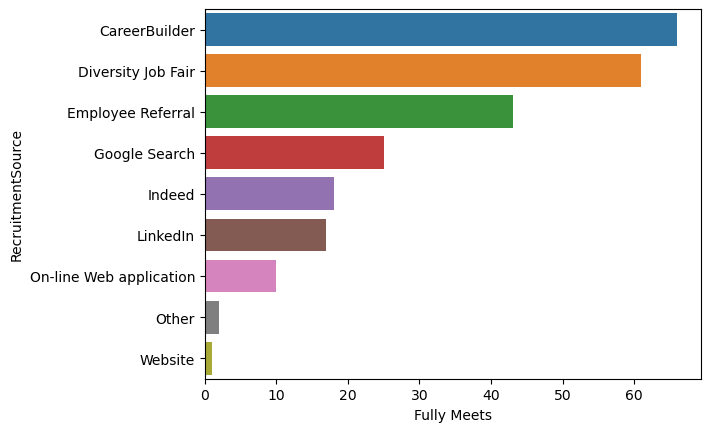

In [43]:
sns.barplot(data = hr_source.sort_values('Fully Meets', ascending = False),
            x = 'Fully Meets', y =  hr_source.index)

#### It seems that Career Builder and Diversity job fair have the most productive employees, and from Diversity job fair we could also ensure that our company have inclusion and that leads to another question does Diversity fair ensure that we have inclusion?

In [75]:
hr.HispanicLatino= hr.HispanicLatino.map({'No': 0, "Yes": 1})

In [90]:
value_counts = hr.value_counts()

In [95]:
hr.groupby('RecruitmentSource').agg({'RaceDesc': 'value_counts'}).unstack()

RaceDesc        \
RaceDesc                American Indian or Alaska Native Asian   
RecruitmentSource                                                
CareerBuilder                                        NaN   2.0   
Diversity Job Fair                                   NaN   NaN   
Employee Referral                                    NaN   1.0   
Google Search                                        1.0   7.0   
Indeed                                               1.0  10.0   
LinkedIn                                             1.0   8.0   
On-line Web application                              NaN   NaN   
Other                                                NaN   NaN   
Website                                              NaN   1.0   

                                                                              \
RaceDesc                Black or African American Hispanic Two or more races   
RecruitmentSource                                                              
CareerBuilder                                 5.0      NaN               NaN   
Diversity Job Fair                           29.0      NaN               NaN   
Employee Referral                             5.0      NaN               NaN   
Google Search                                 4.0      NaN               2.0   
Indeed                                       17.0      1.0               4.0   
LinkedIn                                     16.0      NaN               4.0   
On-line Web application                       NaN      NaN               NaN   
Other                                         NaN      NaN               NaN   
Website                                       4.0      NaN               1.0   

                               
RaceDesc                White  
RecruitmentSource              
CareerBuilder            16.0  
Diversity Job Fair        NaN  
Employee Referral        25.0  
Google Search            35.0  
Indeed                   54.0  
LinkedIn                 47.0  
On-line Web application   1.0  
Other                     2.0  
Website                   7.0

In [96]:
hr.groupby('RecruitmentSource').agg({'HispanicLatino': 'value_counts'}).unstack()

HispanicLatino     
HispanicLatino                     0.0  1.0
RecruitmentSource                          
CareerBuilder                     22.0  1.0
Diversity Job Fair                22.0  7.0
Employee Referral                 28.0  3.0
Google Search                     45.0  4.0
Indeed                            81.0  5.0
LinkedIn                          70.0  6.0
On-line Web application            1.0  NaN
Other                              1.0  NaN
Website                           12.0  1.0

#### Diversity Job Fair has the highest number of Black or African American and HispanicLatino which may imply that it's the best for ensuring inclusion in the company 

### Is there a relationship between salary and employee satisfaction and Performance score?  

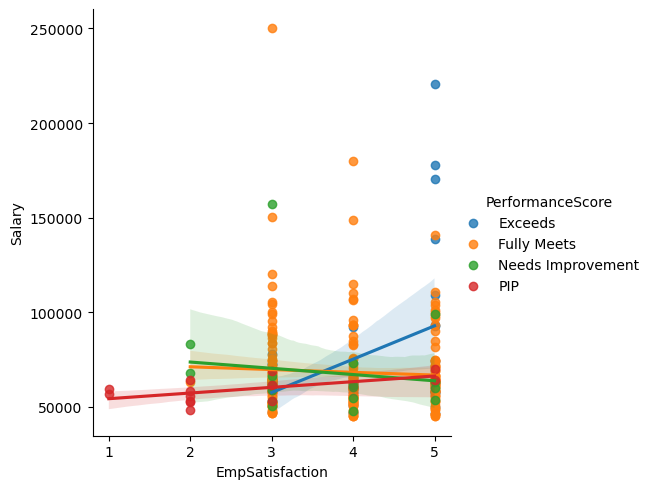

In [44]:
sns.lmplot(data = hr, x = "EmpSatisfaction", y = 'Salary', hue = 'PerformanceScore')

In [54]:
hr.PerformanceScore = hr.PerformanceScore.map({'PIP': 1, "Needs Improvement": 2, "Fully Meets": 3, 'Exceeds': 4})

In [56]:
hr[['EmpSatisfaction', 'PerformanceScore']].corrwith(hr['Salary'], method = 'spearman')

EmpSatisfaction     0.040271
PerformanceScore    0.077359
dtype: float64

#### there seems to be no correlation between salary and satisfaction or performance 

### Can we predict who is going to terminate and who isn't? What level of accuracy can we achieve on this? 

In [57]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y, get dummies (sparse matrix - object to integer)
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=2)
    x, y = sm.fit_resample(x, y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [65]:
hr.drop(['TermReason', 'LastPerformanceReview_Date', 'DateofTermination','DateofHire',
         'RaceDesc', 'HispanicLatino', 'DOB', 'Zip', 'PositionID', 'FromDiversityJobFairID',
        'GenderID', 'MaritalStatusID', 'MarriedID', 'EmpID', 'Employee_Name'], axis = 1, inplace = True)

In [68]:
hr.drop(['EmpStatusID', 'DeptID', 'PerfScoreID', 'Sex', 'MaritalDesc', 'EmploymentStatus', 'ManagerID'], axis = 1, inplace = True)

In [70]:
classification_funct(hr, 'Termd')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.692308,0.750000,0.642857,0.710843
BernoulliNB,0.704545,0.861111,0.596154,0.686747
DecisionTreeClassifier,0.682353,0.805556,0.591837,0.674699
XGBClassifier,0.641026,0.694444,0.595238,0.662651
KNeighborsClassifier,0.564103,0.611111,0.523810,0.590361
GaussianNB,0.653846,0.944444,0.500000,0.566265
SVC,0.615385,1.000000,0.444444,0.457831
LogisticRegression,0.605042,1.000000,0.433735,0.433735
